<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week06/regression_tree_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [ ]:
# Load the data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRtfqgouFp0BnkQf1YRn7vEuRRx_JX0rTZiKRdkV4QZQ0HIYbPxK7Daed7s2cakl-tejHSCA_Kyu5Qw/pub?output=csv'
df = pd.read_csv(url)
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [ ]:
# Explore the data
print('There are', df.duplicated().sum(), 'duplicate values in the data set.')
print('There are', df.isna().sum().sum(), 'missing values in the data set.')
df.info()

There are 0 duplicate values in the data set.
There are 0 missing values in the data set.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


In [ ]:
# Set the target and features
y = df['PRICE']
X = df.drop(columns = 'PRICE')

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
# Build the model
dec_tree = DecisionTreeRegressor(random_state = 42)
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Find the depth and number of nodes
print(dec_tree.get_depth())
print(dec_tree.get_n_leaves())

20
360


In [ ]:
# Determine the depth that maximizes the test R2 score.
depths = list(range(2,21))
scores = pd.DataFrame(index = depths, columns = ['Test Score', 'Train Score'])
for depth in depths:
  dec_tree = DecisionTreeRegressor(max_depth = depth, random_state = 42)
  dec_tree.fit(X_train, y_train)
  scores.loc[depth, 'Test Score'] = dec_tree.score(X_test, y_test)
  scores.loc[depth, 'Train Score'] = dec_tree.score(X_train, y_train)

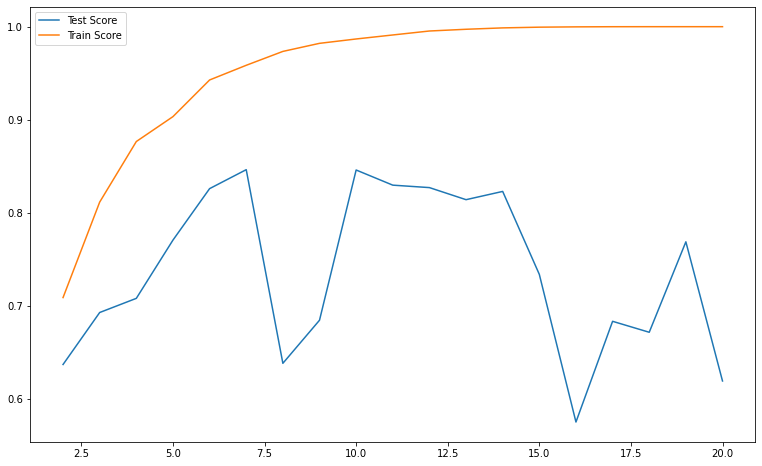

In [ ]:
# Plot the R2 scores
plt.figure(figsize = (13,8))
plt.plot(depths, scores['Test Score'], label = 'Test Score')
plt.plot(depths, scores['Train Score'], label = 'Train Score')
plt.legend()

In [ ]:
# Build the final model. We could use a depth of either 7 or 10 based on 
# the above graph. We will use 7 since it is the smaller amount and will
# make for a more efficient model. 
dec_tree = DecisionTreeRegressor(max_depth = 7, random_state = 42)
dec_tree.fit(X_train, y_train)
print(dec_tree.score(X_train, y_train))
print(dec_tree.score(X_test, y_test))

0.958516936961625
0.8463768203632204
